In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [3]:
code = {"Benign":0 ,"Early":1,"Pre":2,"Pro":3}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [4]:
s=224

In [5]:
import cv2
from tqdm import tqdm
import os


In [6]:
X_train = []
y_train = []
for img in tqdm(os.listdir(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Benign')):
    image = cv2.imread(os.path.join(r"D:\project\ALL-Subtype-Classification\Datasets\Original\Benign",img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Benign'])

100%|██████████| 503/503 [00:00<00:00, 889.79it/s]


In [7]:
for img in tqdm(os.listdir(r"D:\project\ALL-Subtype-Classification\Datasets\Original\Early")):
    image = cv2.imread(os.path.join(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Early',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Early'])

  0%|          | 0/985 [00:00<?, ?it/s]

100%|██████████| 985/985 [00:01<00:00, 905.64it/s]


In [8]:
for img in tqdm(os.listdir(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Pre')):
    image = cv2.imread(os.path.join(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Pre',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Pre'])

  0%|          | 0/963 [00:00<?, ?it/s]

100%|██████████| 963/963 [00:01<00:00, 904.75it/s]


In [9]:
for img in tqdm(os.listdir(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Pro')):
    image = cv2.imread(os.path.join(r'D:\project\ALL-Subtype-Classification\Datasets\Original\Pro',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Pro'])

100%|██████████| 804/804 [00:00<00:00, 954.92it/s]


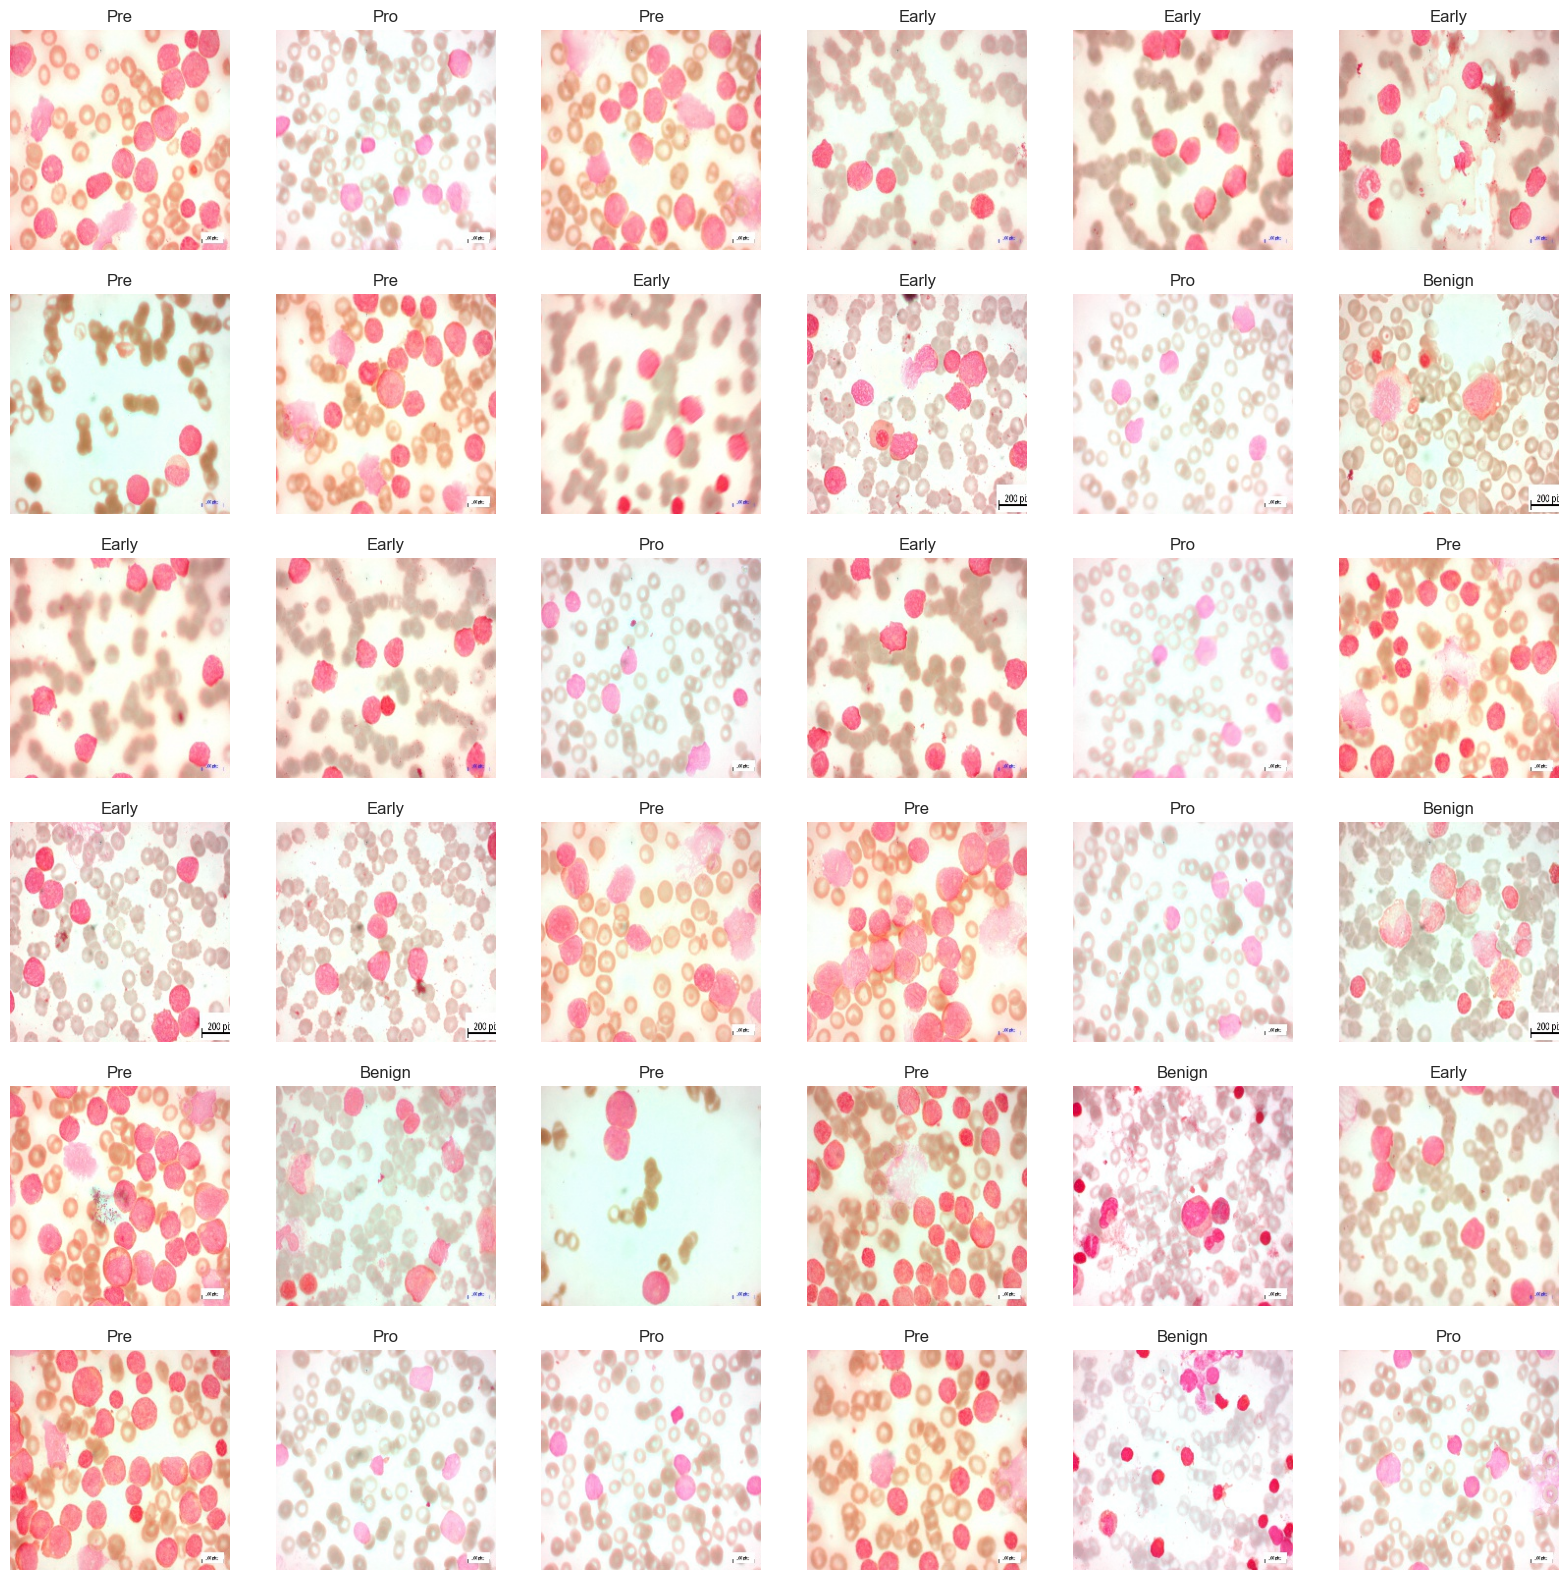

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [11]:
len(X_train)

3255

In [12]:
X_test = []
y_test = []
for img in tqdm(os.listdir(r"D:\project\ALL-Subtype-Classification\Datasets\Segmented\Benign")):
    image = cv2.imread(os.path.join(r'D:\project\ALL-Subtype-Classification\Datasets\Segmented\Benign',img),1)
    image_array = cv2.resize(image , (s,s))
    X_test.append(list(image_array))
    y_test.append(code['Benign'])

100%|██████████| 503/503 [00:00<00:00, 1402.96it/s]


In [13]:
for img in tqdm(os.listdir(r'D:\project\ALL-Subtype-Classification\Datasets\Segmented\Early')):
    image = cv2.imread(os.path.join(r'D:\project\ALL-Subtype-Classification\Datasets\Segmented\Early',img),1)
    image_array = cv2.resize(image , (s,s))
    X_test.append(list(image_array))
    y_test.append(code['Early'])

  0%|          | 0/985 [00:00<?, ?it/s]

100%|██████████| 985/985 [00:00<00:00, 1436.17it/s]


In [14]:
for img in tqdm(os.listdir(r"D:\project\ALL-Subtype-Classification\Datasets\Segmented\Pre")):
    image = cv2.imread(os.path.join(r"D:\project\ALL-Subtype-Classification\Datasets\Segmented\Pre",img),1)
    image_array = cv2.resize(image ,(s,s))
    X_test.append(list(image_array))
    y_test.append(code['Pre'])

  0%|          | 0/963 [00:00<?, ?it/s]

100%|██████████| 963/963 [00:00<00:00, 1410.40it/s]


In [15]:
for img in tqdm(os.listdir(r"D:\project\ALL-Subtype-Classification\Datasets\Segmented\Pro")):
    image = cv2.imread(os.path.join(r"D:\project\ALL-Subtype-Classification\Datasets\Segmented\Pro",img),1)
    image_array = cv2.resize(image ,(s,s))
    X_test.append(list(image_array))
    y_test.append(code['Pro'])

100%|██████████| 804/804 [00:00<00:00, 1663.18it/s]


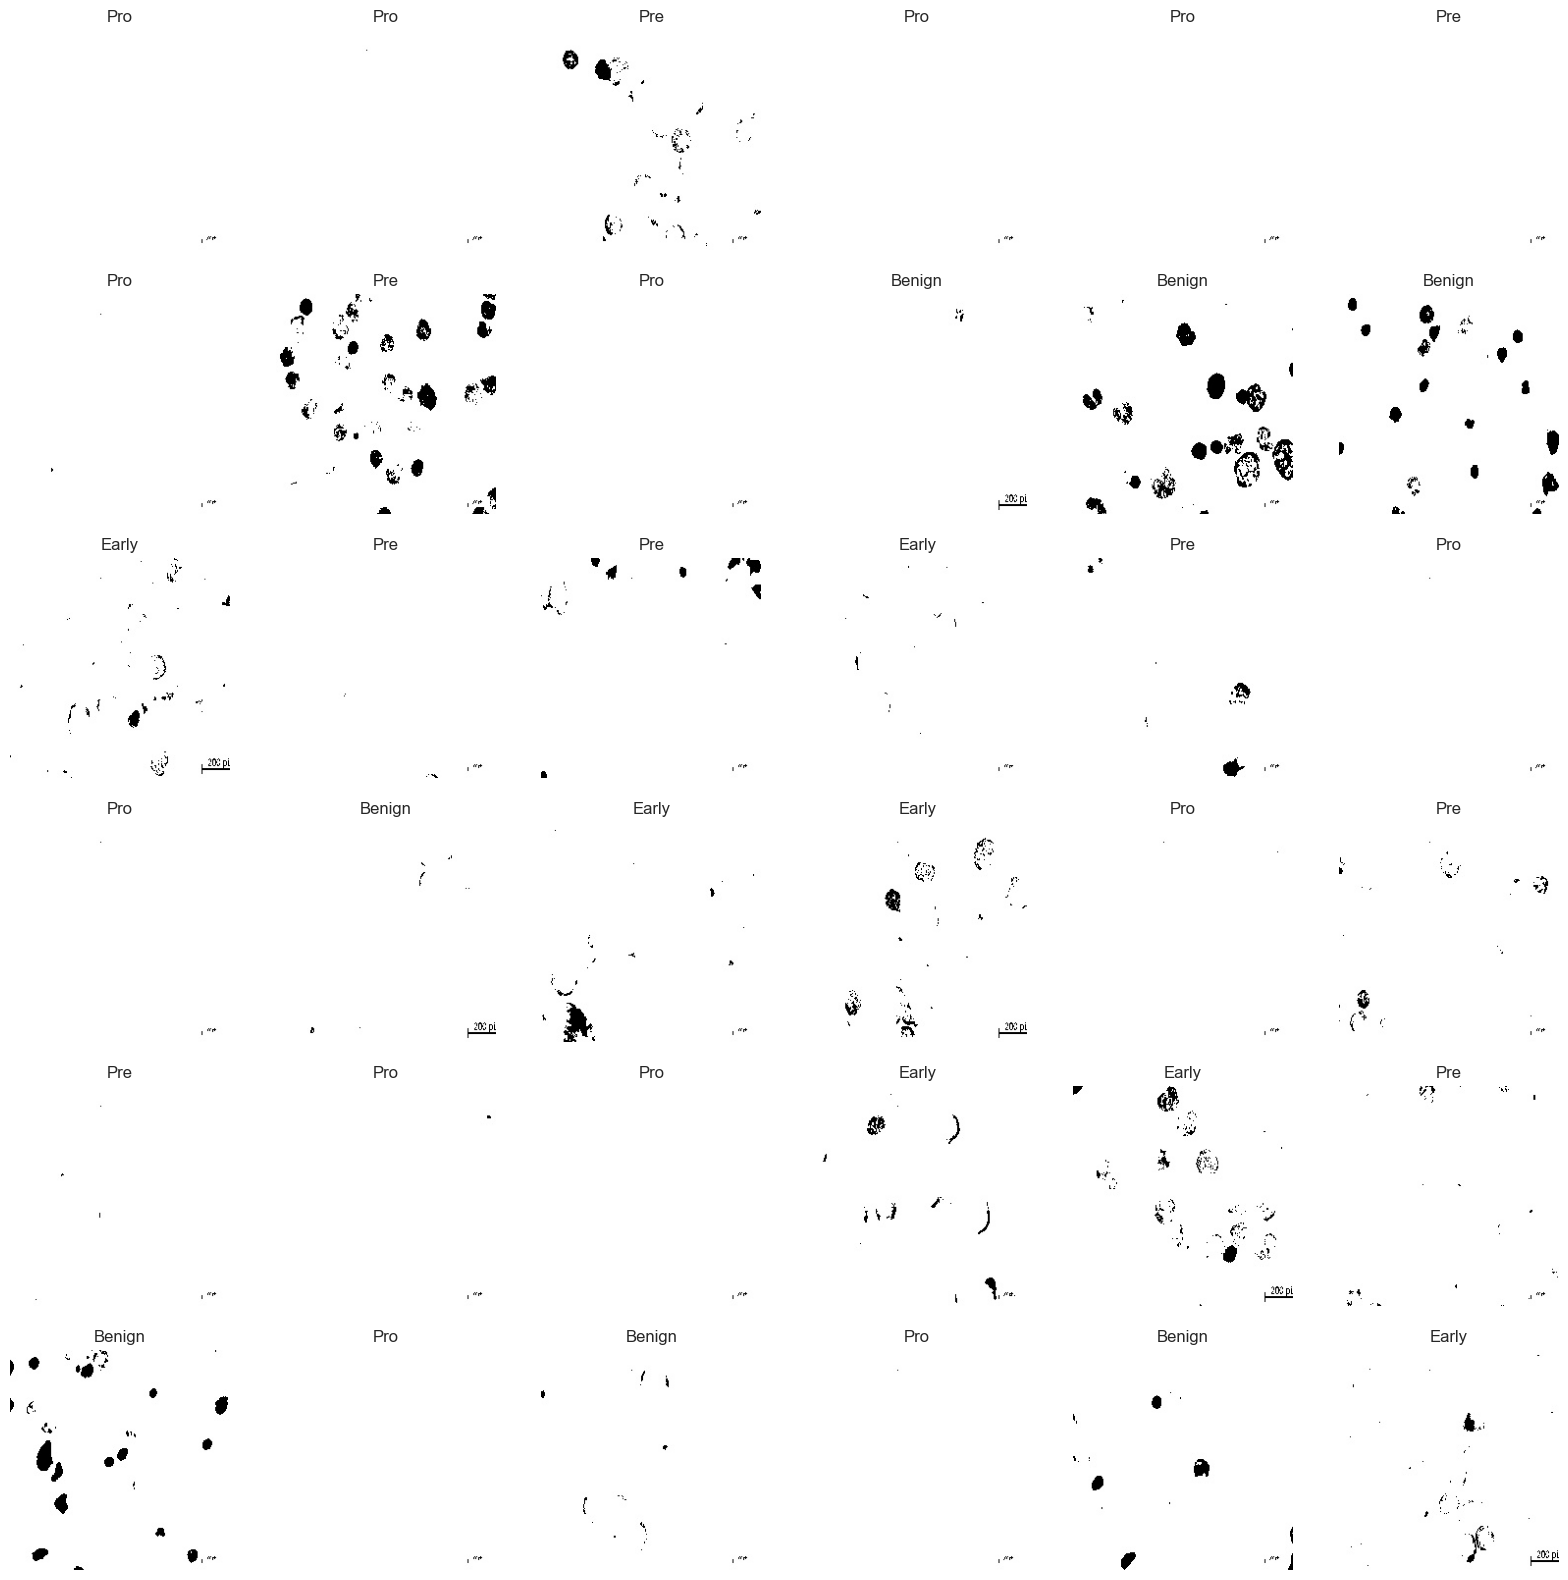

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [17]:
da=[]
for i,j in zip(X_train,y_train):
    da.append([i,j])

In [18]:
import random
random.shuffle(da)

In [26]:
len(da)

4240

In [19]:
X=[]
y=[]
for img,label in da:
    X.append(img)
    y.append(label)

In [20]:
X=np.array(X)
y=np.array(y)


In [21]:


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,shuffle=True)
print(xtest.shape)
print(xtrain.shape)

(651, 224, 224, 3)
(2604, 224, 224, 3)


In [22]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,
        keras.layers.Dense(256,activation='relu') ,
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=0.3) ,
        keras.layers.Dense(128,activation='relu') ,
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100,activation='relu') ,
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50,activation='relu') ,
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=0.5) ,
        keras.layers.Dense(4,activation='softmax') ,
        ])

In [23]:
m_model=tf.keras.applications.vgg19.VGG19()
model1=tf.keras.models.Sequential()
for layer in m_model.layers[:-1]:
    model1.add(layer)
for layer in model1.layers:
    layer.trainable=False
model1.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

In [24]:
model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
print('Model Details are : ')
print(model1.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (Non

In [26]:
history=model1.fit(xtrain,ytrain,batch_size=128,
                  verbose=1,
                  validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
21/21 [==============================] - 322s 16s/step - loss: 0.7209 - accuracy: 0.7131 - val_loss: 0.3383 - val_accuracy: 0.9017
Epoch 2/20
21/21 [==============================] - 347s 17s/step - loss: 0.2409 - accuracy: 0.9182 - val_loss: 0.2234 - val_accuracy: 0.9447
Epoch 3/20
21/21 [==============================] - 317s 15s/step - loss: 0.1619 - accuracy: 0.9501 - val_loss: 0.1870 - val_accuracy: 0.9524
Epoch 4/20
21/21 [==============================] - 303s 15s/step - loss: 0.1267 - accuracy: 0.9670 - val_loss: 0.1578 - val_accuracy: 0.9555
Epoch 5/20
21/21 [==============================] - 308s 15s/step - loss: 0.1129 - accuracy: 0.9689 - val_loss: 0.1580 - val_accuracy: 0.9493
Epoch 6/20
21/21 [==============================] - 315s 15s/step - loss: 0.1077 - accuracy: 0.9693 - val_loss: 0.1313 - val_accuracy: 0.9647
Epoch 7/20
21/21 [==============================] - 345s 17s/step - loss: 0.0883 - accuracy: 0.9770 - val_loss: 0.1223 - val_accuracy: 0.9677
Epoch 

In [27]:
y_pred = model1.predict(xtest)

print('Prediction Shape is {}'.format(y_pred.shape))

21/21 [==============================] - 56s 3s/step
Prediction Shape is (651, 4)


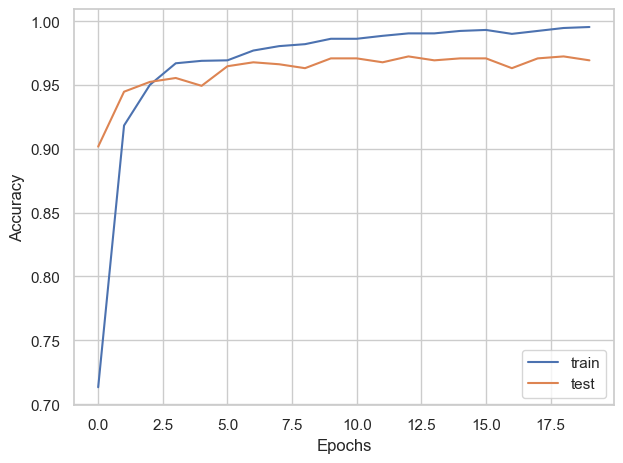

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()

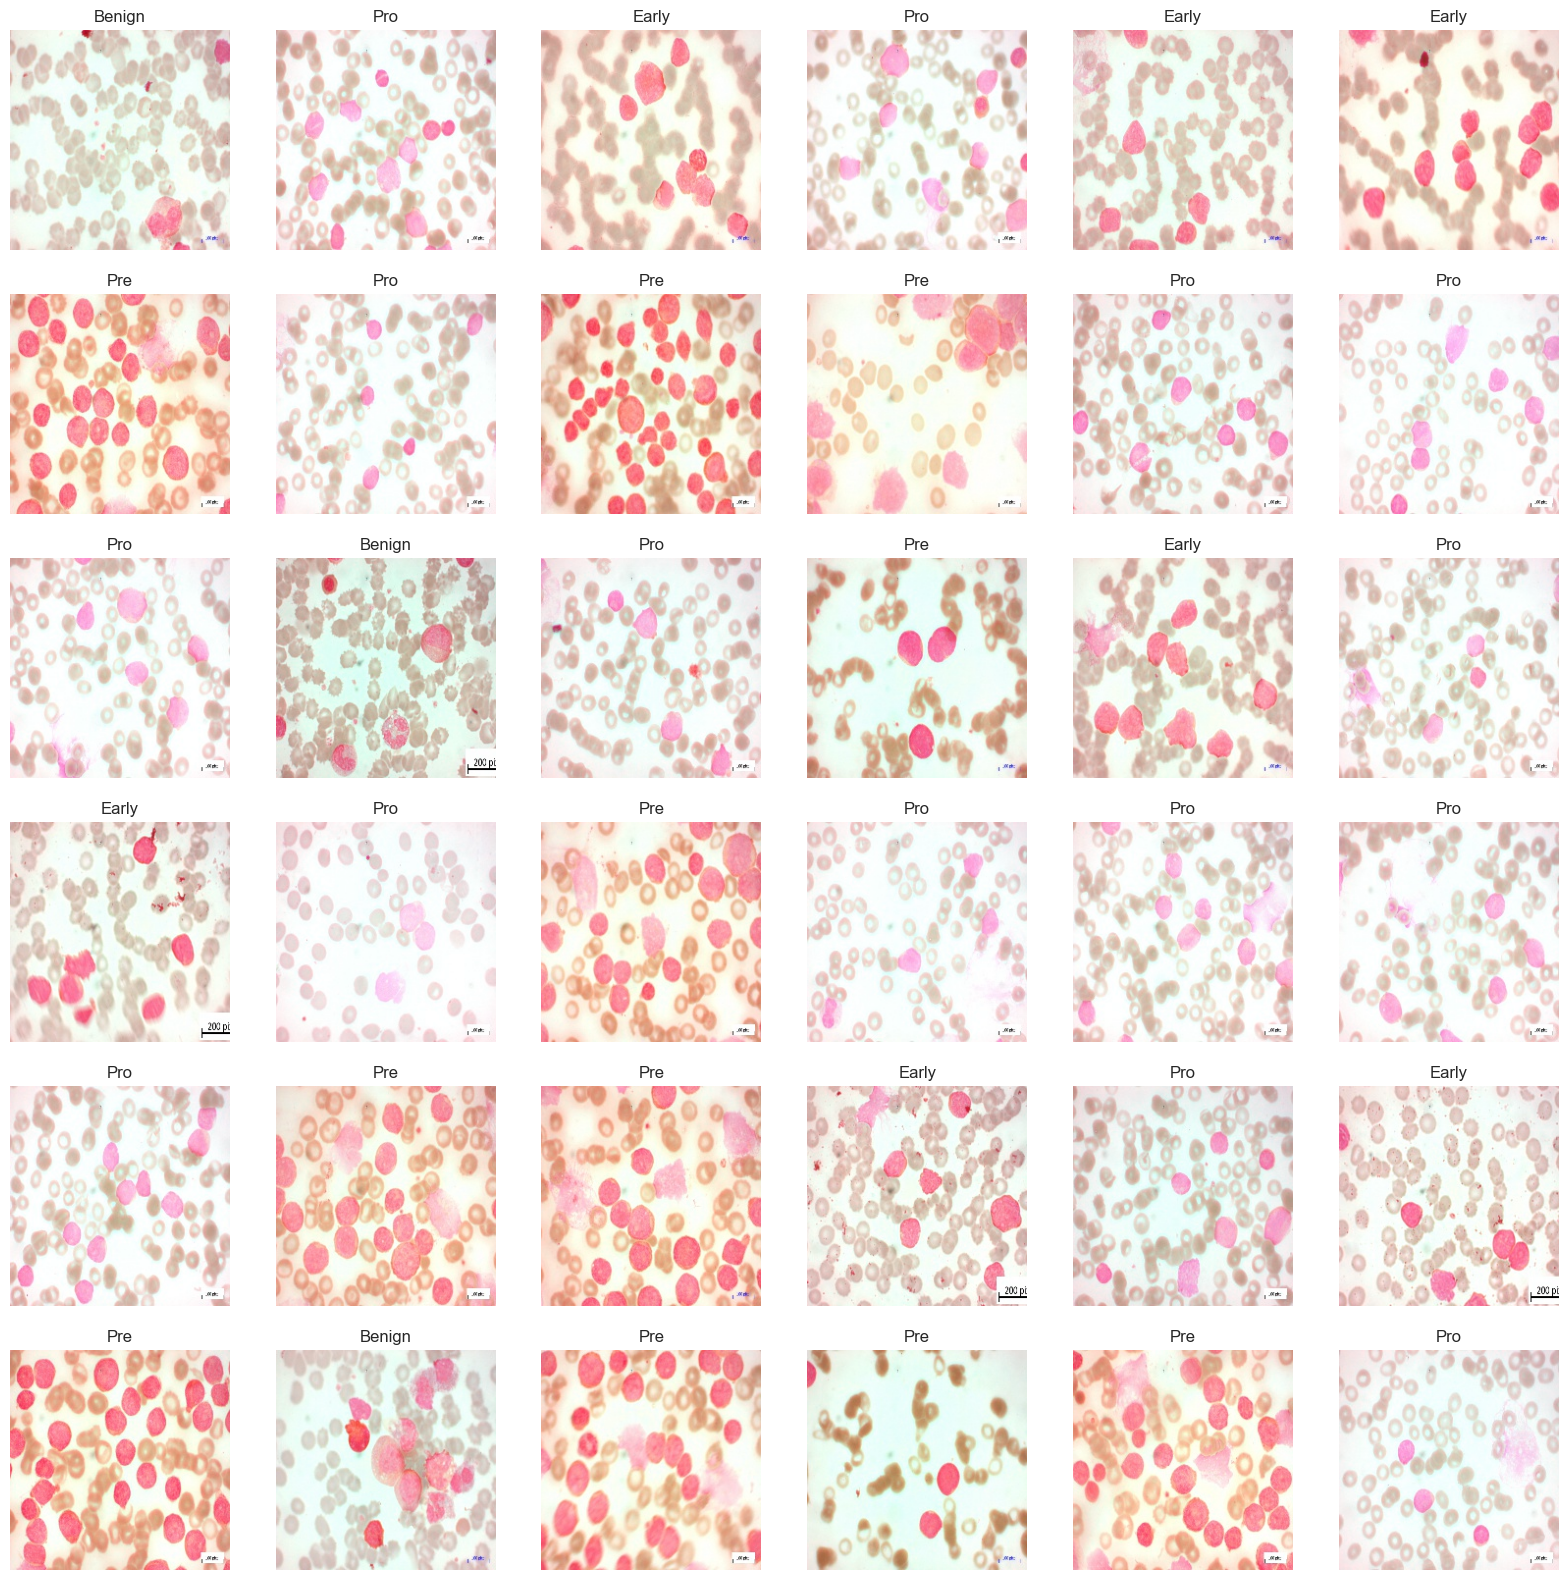

In [29]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(xtest),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(xtest[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))